In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder

## Q1.  50 Startups

+ Reading the data and roughly examining it 

In [3]:
su_df = pd.read_csv('50_Startups.csv')
print(su_df.head(3))

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39


In [4]:
print(su_df.shape)

(50, 5)


In [5]:
print(su_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None


In [6]:
print(su_df.describe())

           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000


In [7]:
lab = LabelEncoder()
df1 = su_df.copy()
df1.columns = ['RD','Admin','MS','St','Profit']
df1['St'] = lab.fit_transform(df1['St'])
print(df1.head(3))

          RD      Admin         MS  St     Profit
0  165349.20  136897.80  471784.10   2  192261.83
1  162597.70  151377.59  443898.53   0  191792.06
2  153441.51  101145.55  407934.54   1  191050.39


In [8]:
print(df1.corr())

              RD     Admin        MS        St    Profit
RD      1.000000  0.241955  0.724248  0.104685  0.972900
Admin   0.241955  1.000000 -0.032154  0.011847  0.200717
MS      0.724248 -0.032154  1.000000  0.077670  0.747766
St      0.104685  0.011847  0.077670  1.000000  0.101796
Profit  0.972900  0.200717  0.747766  0.101796  1.000000


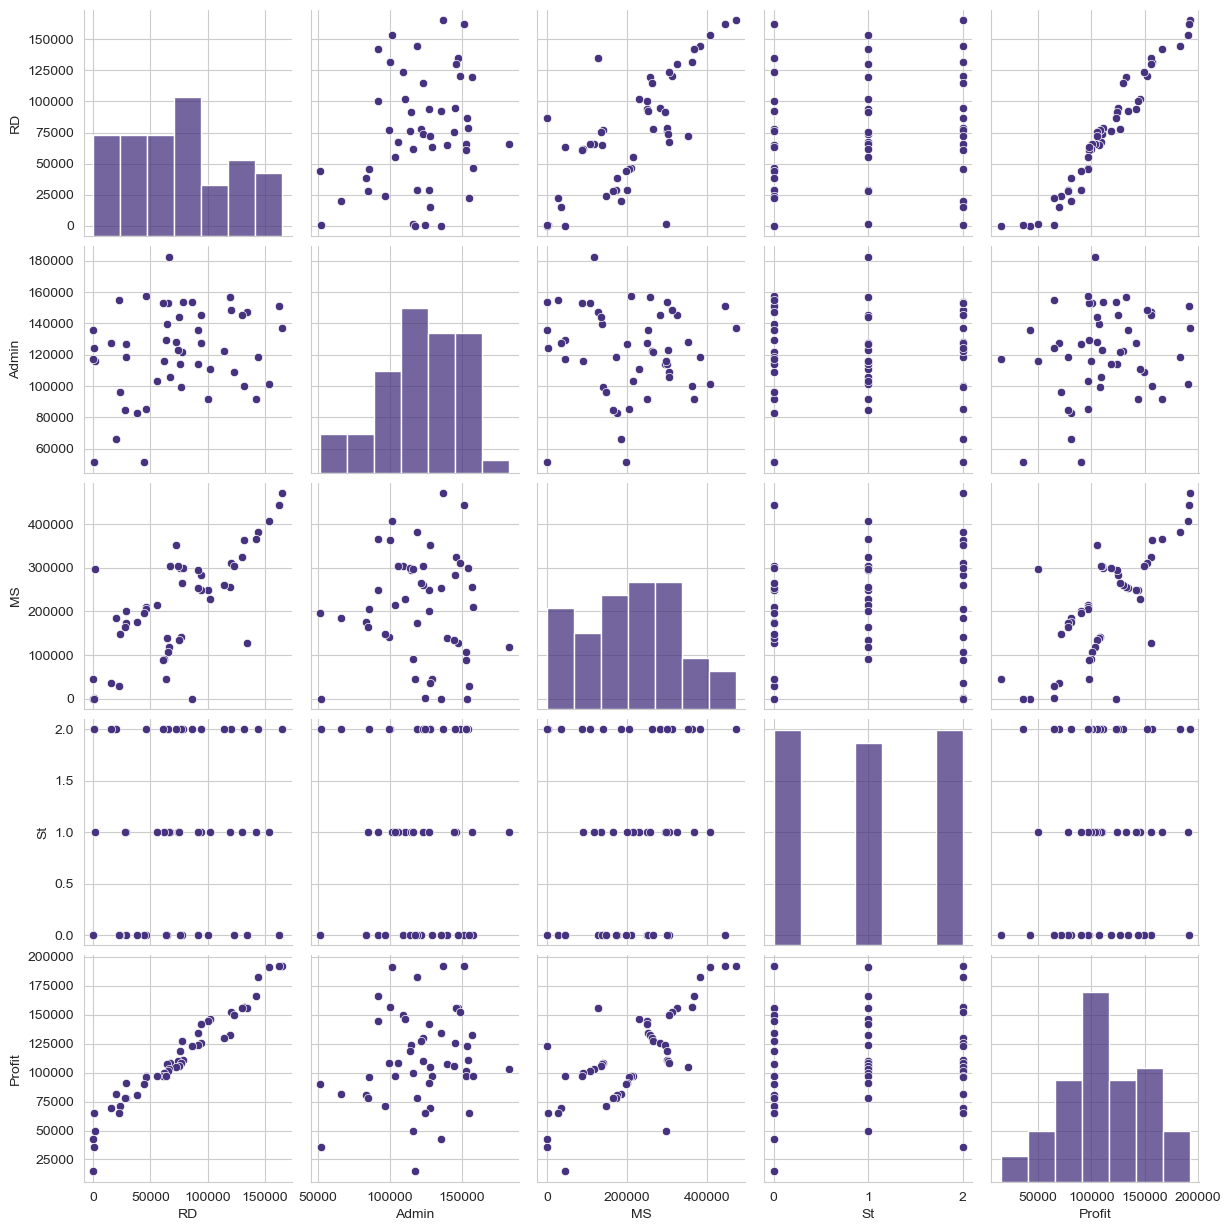

In [9]:
sns.set_palette('viridis')
sns.set_style(style= 'whitegrid')
sns.pairplot(data = df1)
plt.show()

## Model bulding and Checking and their evaluation

In [10]:
model_all = smf.ols('Profit~RD+Admin+MS+St',data=df1).fit()
print(model_all.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           8.51e-29
Time:                        08:34:15   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.014e+04   6804.555      7.369      0.0

In [11]:
# Coefficents
print(model_all.params)

Intercept    50142.506443
RD               0.805760
Admin           -0.026826
MS               0.027228
St             -22.320577
dtype: float64


In [12]:
# t-values and p-values
print(f''' t- values :-\n{model_all.tvalues},\n \n p- values :-\n{model_all.pvalues}''')

 t- values :-
Intercept     7.368962
RD           17.608621
Admin        -0.519906
MS            1.636966
St           -0.013865
dtype: float64,
 
 p- values :-
Intercept    2.900008e-09
RD           8.249206e-22
Admin        6.056771e-01
MS           1.086131e-01
St           9.889988e-01
dtype: float64


In [13]:
# R squared values
print(f'''R Squared values :- {model_all.rsquared} ,
Adjusted R Squared values :- {model_all.rsquared_adj}''')

R Squared values :- 0.9507462044842656 ,
Adjusted R Squared values :- 0.9463680893273114


### Even Though R Squared values = 0.95, p-values of 'Administration',	'Marketing Spend' and	'State' all are greater than 0.05 hence we don't have enough evidence to conclude that these variables have a significant impact on the dependent variable.

## Hence we reject State as dependent variable 

In [14]:
model_rd_admin_ms = smf.ols('Profit~RD+Admin+MS',data = df1).fit()
print(model_rd_admin_ms.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           4.53e-30
Time:                        08:34:43   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.0

In [15]:
# Coefficents
print(model_rd_admin_ms.params)

Intercept    50122.192990
RD               0.805715
Admin           -0.026816
MS               0.027228
dtype: float64


In [16]:
# t- value and p-value
print(f''' t- values :-\n{model_rd_admin_ms.tvalues},\n \n p- values :-\n{model_rd_admin_ms.pvalues}''')

 t- values :-
Intercept     7.626218
RD           17.846374
Admin        -0.525507
MS            1.655077
dtype: float64,
 
 p- values :-
Intercept    1.057379e-09
RD           2.634968e-22
Admin        6.017551e-01
MS           1.047168e-01
dtype: float64


In [17]:
# R squared values
print(f'''R Squared values :- {model_rd_admin_ms.rsquared} ,
Adjusted R Squared values :- {model_rd_admin_ms.rsquared_adj}''')

R Squared values :- 0.9507459940683246 ,
Adjusted R Squared values :- 0.9475337762901719


## There is negligible decrease in r_squared value next we reject Admin variable

In [18]:
model_rd_ms = smf.ols('Profit~RD+MS',data = df1).fit()
print(model_rd_ms.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           2.16e-31
Time:                        08:35:38   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.0

In [19]:
# Coefficents
print(model_rd_ms.params)

Intercept    46975.864221
RD               0.796584
MS               0.029908
dtype: float64


In [20]:
# t- value and p-value
print(f''' t- values :-\n{model_rd_ms.tvalues},\n \n p- values :-\n{model_rd_ms.pvalues}''')

 t- values :-
Intercept    17.463582
RD           19.265555
MS            1.927052
dtype: float64,
 
 p- values :-
Intercept    3.504062e-22
RD           6.040433e-24
MS           6.003040e-02
dtype: float64


In [21]:
# R squared values
print(f'''R Squared values :- {model_rd_ms.rsquared} ,
Adjusted R Squared values :- {model_rd_ms.rsquared_adj}''')

R Squared values :- 0.9504503015559763 ,
Adjusted R Squared values :- 0.9483418037498477


## There is negligible decrease in r_squared value next even though now p-value of 'MS' is close to 0.05 still less than it. we prepare model to see the change

In [22]:
model_rd = smf.ols('Profit~RD',data = df1).fit()
print(model_rd.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           3.50e-32
Time:                        08:36:42   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.0

In [23]:
# Coefficents
print(model_rd.params)

Intercept    49032.899141
RD               0.854291
dtype: float64


In [24]:
# t- value and p-value
print(f''' t- values :-\n{model_rd.tvalues},\n \n p- values :-\n{model_rd.pvalues}''')

 t- values :-
Intercept    19.320288
RD           29.151139
dtype: float64,
 
 p- values :-
Intercept    2.782697e-24
RD           3.500322e-32
dtype: float64


In [25]:
# R squared values
print(f'''R Squared values :- {model_rd.rsquared} ,
Adjusted R Squared values :- {model_rd.rsquared_adj}''')

R Squared values :- 0.9465353160804393 ,
Adjusted R Squared values :- 0.9454214684987817


## R_squared table for each model

In [26]:
d1 = {'model':['model_all','model_rd_admin_ms',
               'model_rd_ms','model_rd'],
      'r squared value':[model_all.rsquared,model_rd_admin_ms.rsquared,
                         model_rd_ms.rsquared,model_rd.rsquared],
      'adj r squared value':[model_all.rsquared_adj,model_rd_admin_ms.rsquared_adj,
                             model_rd_ms.rsquared_adj,model_rd.rsquared_adj]
     }
r2_df = pd.DataFrame(d1)
print(r2_df)

               model  r squared value  adj r squared value
0          model_all         0.950746             0.946368
1  model_rd_admin_ms         0.950746             0.947534
2        model_rd_ms         0.950450             0.948342
3           model_rd         0.946535             0.945421


+ From the models above it can be concluded 'R&D Spend' was the driving variable for 'Profit' in all start up other dependent factors had marginal impact on profit. Among all the remaining dependent variable 'Marketing Spend' seems to have maximum influence on the 'Profit'. However, it is very small compared to 'R&D Spend'.

## Q2 :- Toyoto Corolla

In [27]:
toyo = pd.read_csv("ToyotaCorolla.csv", encoding='windows-1252',
                   usecols=["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"])
print(toyo.head(3))

   Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165


In [28]:
print(toyo.shape)

(1436, 9)


In [29]:
print(toyo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB
None


In [30]:
print(toyo.describe())

              Price    Age_08_04             KM           HP           cc  \
count   1436.000000  1436.000000    1436.000000  1436.000000   1436.00000   
mean   10730.824513    55.947075   68533.259749   101.502089   1576.85585   
std     3626.964585    18.599988   37506.448872    14.981080    424.38677   
min     4350.000000     1.000000       1.000000    69.000000   1300.00000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.00000   
50%     9900.000000    61.000000   63389.500000   110.000000   1600.00000   
75%    11950.000000    70.000000   87020.750000   110.000000   1600.00000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.00000   

             Doors        Gears  Quarterly_Tax      Weight  
count  1436.000000  1436.000000    1436.000000  1436.00000  
mean      4.033426     5.026462      87.122563  1072.45961  
std       0.952677     0.188510      41.128611    52.64112  
min       2.000000     3.000000      19.000000  1000.00000  
2

In [31]:
print(f"Total null value in the data set for every dependendent variable are \n\n{toyo.isnull().sum()} ")

Total null value in the data set for every dependendent variable are 

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64 


In [32]:
print(toyo.corr())

                  Price  Age_08_04        KM        HP        cc     Doors  \
Price          1.000000  -0.876590 -0.569960  0.314990  0.126389  0.185326   
Age_08_04     -0.876590   1.000000  0.505672 -0.156622 -0.098084 -0.148359   
KM            -0.569960   0.505672  1.000000 -0.333538  0.102683 -0.036197   
HP             0.314990  -0.156622 -0.333538  1.000000  0.035856  0.092424   
cc             0.126389  -0.098084  0.102683  0.035856  1.000000  0.079903   
Doors          0.185326  -0.148359 -0.036197  0.092424  0.079903  1.000000   
Gears          0.063104  -0.005364  0.015023  0.209477  0.014629 -0.160141   
Quarterly_Tax  0.219197  -0.198431  0.278165 -0.298432  0.306996  0.109363   
Weight         0.581198  -0.470253 -0.028598  0.089614  0.335637  0.302618   

                  Gears  Quarterly_Tax    Weight  
Price          0.063104       0.219197  0.581198  
Age_08_04     -0.005364      -0.198431 -0.470253  
KM             0.015023       0.278165 -0.028598  
HP             

## Model Building 

In [33]:
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyo).fit()

In [34]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sat, 16 Dec 2023   Prob (F-statistic):               0.00
Time:                        08:38:34   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949

In [35]:
print(model.params)

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64


In [36]:
print(f"R_squared :- {model.rsquared} \nR_squared_adjusted :- {model.rsquared_adj}")

R_squared :- 0.8637627463428192 
R_squared_adjusted :- 0.8629989775766963


## Residual anaylsis for the model

In [37]:
print(model.resid)

0      -3312.580505
1      -2522.355186
2      -2850.732460
3      -1476.496731
4      -2472.419010
           ...     
1431   -1293.758297
1432    2553.661579
1433      45.701993
1434   -1328.038121
1435   -3452.438333
Length: 1436, dtype: float64


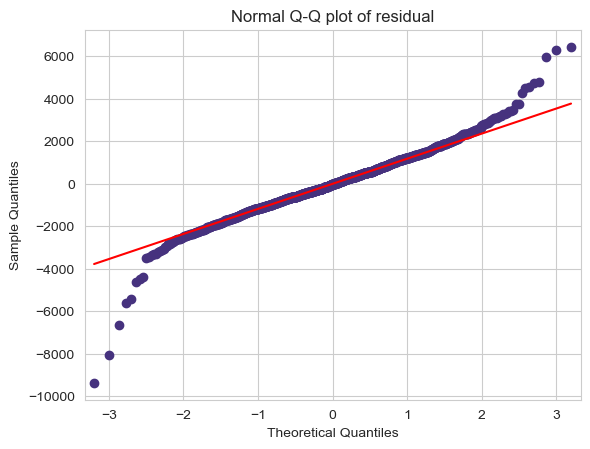

In [38]:
import statsmodels.api as sm
sm.qqplot(model.resid,line = 'q')
plt.title("Normal Q-Q plot of residual")
plt.show()

## Several outliers can be obsereved in the data set which the the model is not taking into account 

## Model deletion diagnostics :- 
+ Cook's Distance :- to detect ouliers

In [39]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

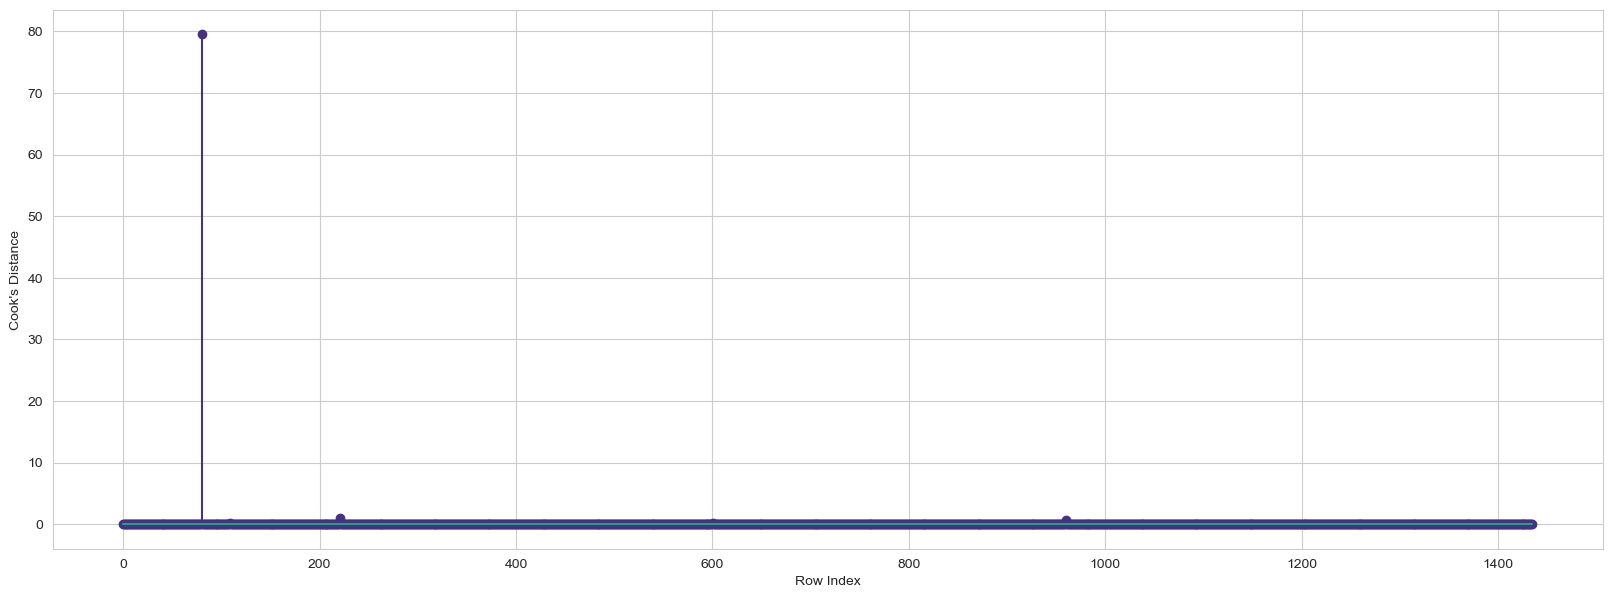

In [40]:
# plot the influence values using stem plot
fig = plt.subplots(figsize = ((20,7)))
plt.stem(np.arange(len(toyo)),np.round(c,3))
plt.xlabel("Row Index")
plt.ylabel("Cook's Distance")
plt.show()

In [41]:
print((np.argmax(c),np.max(c)))

(80, 79.52010624137341)


## Removing the outlier and rebuilding the model

In [42]:
toyo1 = toyo.drop(toyo.index[[80]],axis = 0)

In [43]:
toyo1 = toyo1.reset_index()

In [44]:
model_rev_1 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyo1).fit()

In [45]:
model_rev_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Sat, 16 Dec 2023   Prob (F-statistic):               0.00
Time:                        08:40:00   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age_08_04      -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM               -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP               39.3463      2.911     13.516      0.000      33.636      45.057
cc               -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors           -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears           523.9416    192.865      2.717      0.007     145.612     902.271
Quarterly_Tax     9.0440      1.425      6.348      0.000       6.249      11.839
Weight           20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
print(model_rev_1.params)

Intercept       -6284.740060
Age_08_04        -120.455049
KM                 -0.017849
HP                 39.346295
cc                 -2.524177
Doors             -27.228488
Gears             523.941556
Quarterly_Tax       9.043968
Weight             20.165459
dtype: float64


In [47]:
print(f"R_squared :- {model.rsquared} \nR_squared_adjusted :- {model.rsquared_adj}")

R_squared :- 0.8637627463428192 
R_squared_adjusted :- 0.8629989775766963


In [48]:
model_influence = model_rev_1.get_influence()
(c,_) = model_influence.cooks_distance

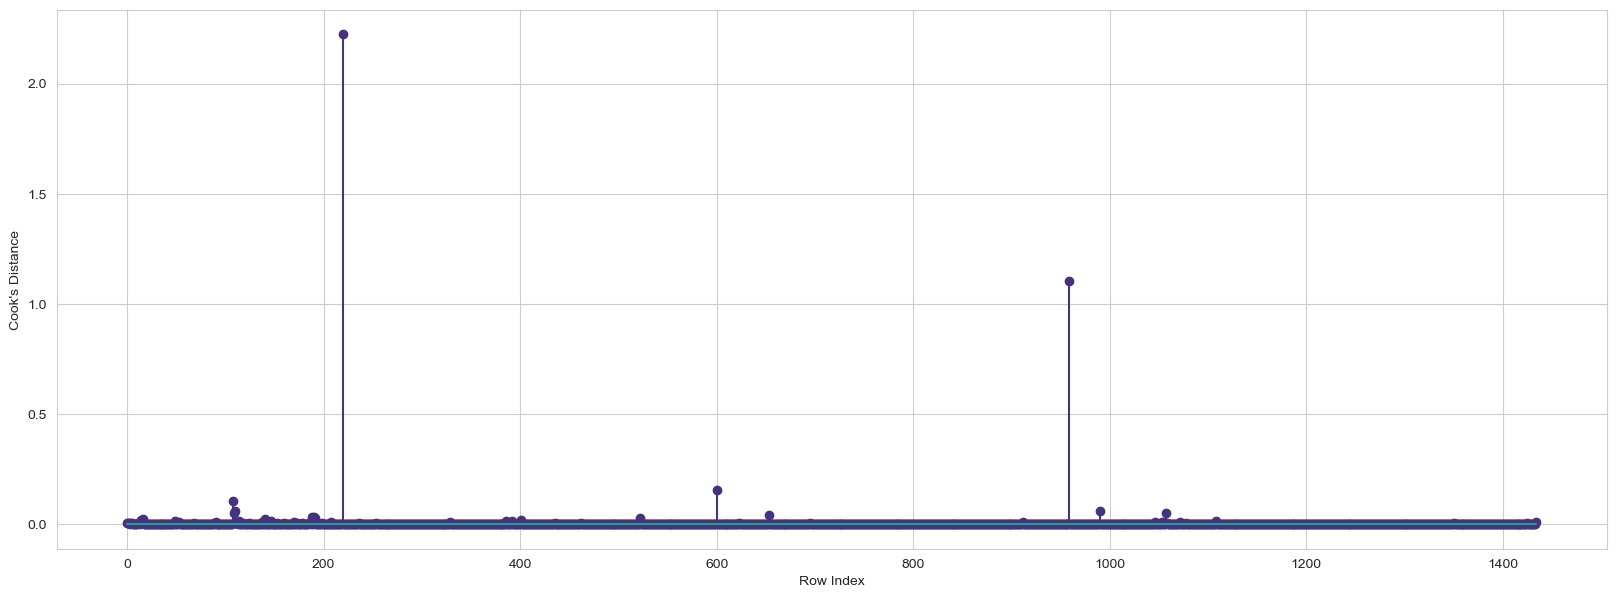

In [49]:
# plot the influence values using stem plot
fig = plt.subplots(figsize = ((20,7)))
plt.stem(np.arange(len(toyo1)),np.round(c,3))
plt.xlabel("Row Index")
plt.ylabel("Cook's Distance")
plt.show()

In [50]:
print(f"Indices where cooks distance is greater than 1 are \n {np.argwhere(c>1)} ")

Indices where cooks distance is greater than 1 are 
 [[220]
 [959]] 


In [51]:
toyo_final=toyo1.drop(toyo1.index[[220,959]],axis=0).reset_index()

In [52]:
model_final = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyo_final).fit()

In [53]:
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Sat, 16 Dec 2023   Prob (F-statistic):               0.00
Time:                        08:40:45   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age_08_04      -112.0180      2.479    -45.185      0.000    -116.881    -107.155
KM               -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP               36.6084      2.745     13.334      0.000      31.223      41.994
cc               -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Doors          -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gears           464.9839    180.976      2.569      0.010     109.975     819.993
Quarterly_Tax     5.2134      1.371      3.802      0.000       2.523       7.904
Weight           30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
print(model_final.params)

Intercept       -14743.311719
Age_08_04         -112.018007
KM                  -0.016992
HP                  36.608402
cc                  -3.795426
Doors             -122.543739
Gears              464.983862
Quarterly_Tax        5.213440
Weight              30.639784
dtype: float64


In [55]:
print(f"R_squared :- {model_final.rsquared} \nR_squared_adjusted :- {model_final.rsquared_adj}")

R_squared :- 0.8851845904421739 
R_squared_adjusted :- 0.8845395600513997


In [56]:
model_influence = model_final.get_influence()
(c,_) = model_influence.cooks_distance

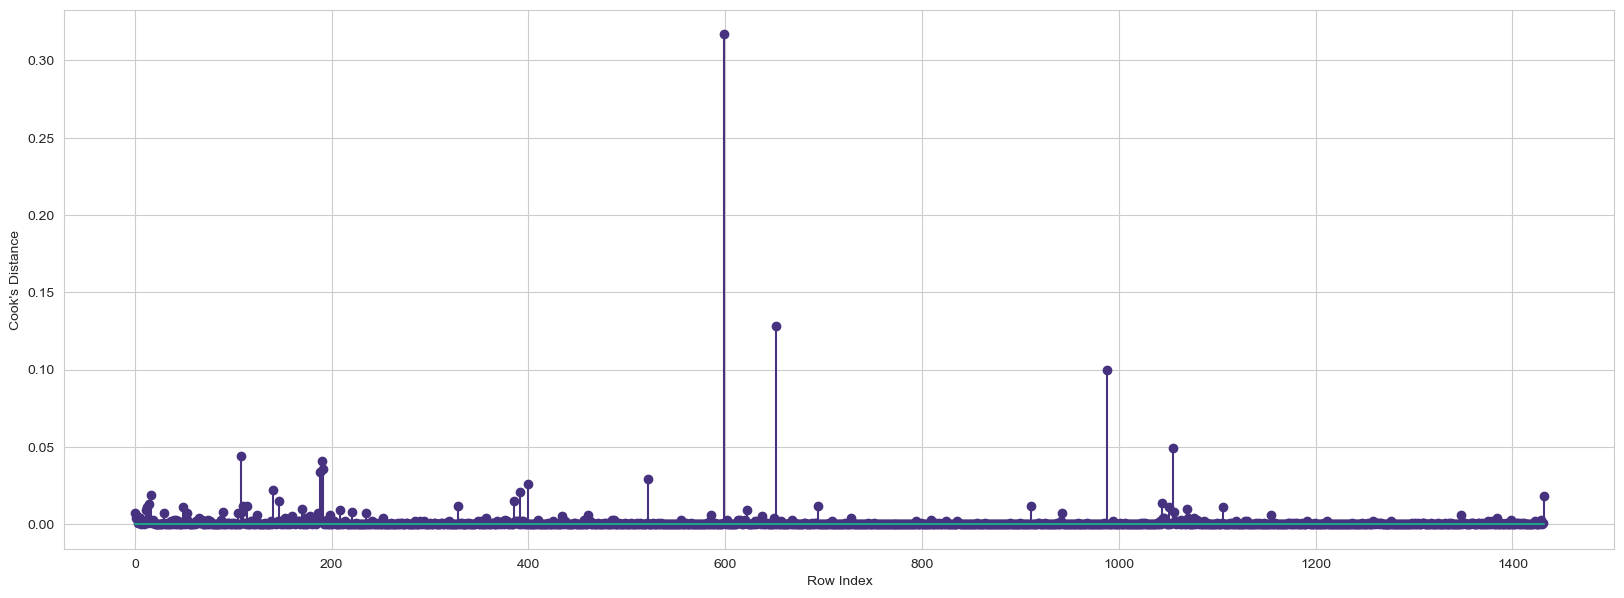

In [57]:
# plot the influence values using stem plot
fig = plt.subplots(figsize = ((20,7)))
plt.stem(np.arange(len(toyo_final)),np.round(c,3))
plt.xlabel("Row Index")
plt.ylabel("Cook's Distance")
plt.show()

## Since no data points have cook's distance > 0.5 for all remaing data points we stop the diagnosis and finalize the model 

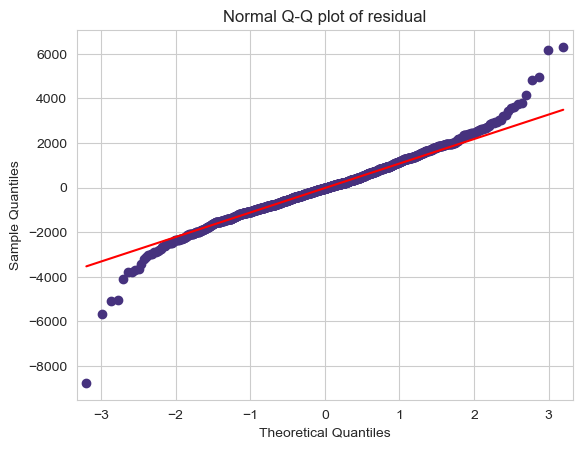

In [58]:
sm.qqplot(model_final.resid,line = 'q')
plt.title("Normal Q-Q plot of residual")
plt.show()